### Loading Data
Dan Constantini, Tom Hayat et Alexandre Attia
This script loads 11 data class from imagenet and sort the files according to their name

In [1]:
require 'torch'
require 'xlua'
require 'image'


--classes={'bridge', 'building', 'city', 'eiffel_tower','elephant', 'landscape', 'lion', 'monkey', 'people', 'tower', 'water'}


imagesAll = torch.Tensor(1721,3,64,64) 
labelsAll = torch.Tensor(1721)
compteur = 0
compteur2 = 0
for dir in paths.iterdirs("./dataset/train/") do
    compteur = compteur +1
    files = {}
    for file in paths.files(paths.concat('./dataset/train/', dir)) do
       if file:find('JPEG' .. '$') then
          table.insert(files, paths.concat(paths.concat('./dataset/train/',dir), file))
       end
    end
   
    if #files == 0 then
       error('given directory doesnt contain any files of type: ')
    end

    print(#files)
    temp2 = compteur2
     for i=1,(#files) do
        temp = image.load(files[i])

        if (temp:size()[1]==3) then
            compteur2 = compteur2 + 1
            imagesAll[temp2 + i] = image.load(files[i]) 
            labelsAll[temp2 + i] = compteur
        end
    end
    collectgarbage()
end


182	


157	


85	


17	


223	


44	


288	


215	


164	


153	


190	


In [2]:
-- Nombre d'images courleurs: 1683 
trainData = {
   data = torch.Tensor(1683, 3, 64, 64),
   labels = torch.Tensor(1683),
}
--[[create test set:
testData = {
      data = torch.Tensor(tesize, 1, 32, 32),
      labels = torch.Tensor(tesize),
      size = function() return tesize end
   }
]]--

for i=1,1683 do
   trainData.data[i] = imagesAll[i]
   trainData.labels[i] = labelsAll[i]
end
--for i=trsize+1,tesize+trsize do
   --testData.data[i-trsize] = imagesAll[labelsShuffle[i]][1]:clone()
   --testData.labels[i-trsize] = labelsAll[labelsShuffle[i]]
--end

In [3]:
trainData

{
  data : DoubleTensor - size: 1683x3x64x64
  labels : DoubleTensor - size: 1683
}


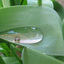

11	


In [4]:
itorch.image(imagesAll[1683])
print(labelsAll[1683])


<b>Problème :</b> à partir de l'image 288, les images sont entierement noirs et le label est nul. Je pense qu'il y a un probleme avec le `if (temp:size()[1]==3) then` ! En fait c'est avant je crois, quand on print le nombre de files ils en mettent que 190 .. --> J'ai compris on a un probleme dans la boucle, en fait, elle repart de 0 à chaque fois pour imageAll, donc à chaque fois qu'on parcourt un repertory d'images on réécrit sur les images anciennes (la liste `files` est temporaire. Le nombres d'images dans imagesAll est donc 288 car le nombre maximal d'images des dossiers du dataset est 288. 

``for i=1,(#files) do
        print('dossier : ', compteur)
        print(#files)
        temp = image.load(files[i])
        --print(files[i])
        if (temp:size()[1]==3) then
            imagesAll[i] = image.load(files[i]) 
            labelsAll[i] = compteur
        end
    end
``

Est ce que ce code là on le sort pas de la grosse boucle ?

## Preprocessing Data